In [1]:
!pip install pydotplus

In [2]:
!pip install pydot

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, r2_score

In [4]:
def regression_metrics(y_test, y_pred):
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {(mean_squared_error(y_test, y_pred))**0.5}')
    print(f'MAPE: {(mean_absolute_percentage_error(y_test, y_pred))**0.5}')
    print(f'R^2: {r2_score(y_test, y_pred)}')

In [5]:
rand_state = 1000

In [6]:
data = pd.read_csv('../data/DataSet3.csv')

In [7]:
data.head()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,NaN,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   area              6255 non-null   float64
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   float64
 5   Bathrooms         6255 non-null   float64
 6   Balcony           6255 non-null   float64
 7   Status            5774 non-null   object 
 8   neworold          6255 non-null   object 
 9   parking           6255 non-null   float64
 10  Furnished_status  3600 non-null   object 
 11  Lift              6255 non-null   float64
 12  type_of_building  6255 non-null   object 
dtypes: float64(9), object(4)
memory usage: 635.4+ KB


In [9]:
data = data.dropna()

In [10]:
data = data.rename(
    columns={
        'Bedrooms' : 'bedrooms',
        'Bathrooms' : 'bathrooms',
        'Balcony' : 'balcony',
        'Status' : 'status',
        'neworold' : 'new_or_old',
        'Furnished_status' : 'furnished_status',
        'Lift' : 'lift'})

In [11]:
data.columns

Index(['price', 'area', 'latitude', 'longitude', 'bedrooms', 'bathrooms',
       'balcony', 'status', 'new_or_old', 'parking', 'furnished_status',
       'lift', 'type_of_building'],
      dtype='object')

In [12]:
data['price']= data['price'].astype(int)
data['bedrooms']= data['bedrooms'].astype(int)
data['bathrooms']= data['bathrooms'].astype(int)
data['balcony']= data['balcony'].astype(int)
data['parking']= data['parking'].astype(int)
data['lift']= data['lift'].astype(int)
data['area']= data['area'].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 16 to 6253
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3125 non-null   int32  
 1   area              3125 non-null   int32  
 2   latitude          3125 non-null   float64
 3   longitude         3125 non-null   float64
 4   bedrooms          3125 non-null   int32  
 5   bathrooms         3125 non-null   int32  
 6   balcony           3125 non-null   int32  
 7   status            3125 non-null   object 
 8   new_or_old        3125 non-null   object 
 9   parking           3125 non-null   int32  
 10  furnished_status  3125 non-null   object 
 11  lift              3125 non-null   int32  
 12  type_of_building  3125 non-null   object 
dtypes: float64(2), int32(7), object(4)
memory usage: 256.3+ KB


In [14]:
outlier = data[['price','area','latitude','longitude','bedrooms','bathrooms','balcony','parking','lift']]
outlier

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
16,102000000,3180,19.057490,72.850961,4,4,1,1,1
17,22500000,1000,19.233532,72.839195,3,3,1,1,1
19,15500000,875,19.174674,72.943104,2,2,1,1,1
22,55000000,2430,19.154784,72.854061,4,4,4,4,4
24,23900000,950,19.137356,72.836952,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...
6246,29000000,1250,19.028608,72.879402,3,3,1,1,1
6248,22000000,1200,19.211020,72.871720,3,3,0,0,0
6250,19500000,810,19.138320,72.810020,2,2,0,0,0
6251,22000000,1400,19.221920,72.854250,3,3,1,1,1


In [15]:
Q1 = outlier.quantile(0.25)
Q1

price        1.250000e+07
area         8.000000e+02
latitude     1.907907e+01
longitude    7.283087e+01
bedrooms     2.000000e+00
bathrooms    2.000000e+00
balcony      0.000000e+00
parking      0.000000e+00
lift         0.000000e+00
Name: 0.25, dtype: float64

In [16]:
Q3 = outlier.quantile(0.75)
Q3

price        3.000000e+07
area         1.250000e+03
latitude     1.921407e+01
longitude    7.287654e+01
bedrooms     3.000000e+00
bathrooms    3.000000e+00
balcony      1.000000e+00
parking      1.000000e+00
lift         1.000000e+00
Name: 0.75, dtype: float64

In [17]:
IQR = Q3-Q1

In [18]:
df = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
17,22500000,1000,19.233532,72.839195,3,3,1,1,1
19,15500000,875,19.174674,72.943104,2,2,1,1,1
24,23900000,950,19.137356,72.836952,2,2,0,0,0
25,25000000,900,19.128420,72.819880,2,2,1,1,1
29,39800000,1765,19.003832,72.850516,3,2,1,1,1
...,...,...,...,...,...,...,...,...,...
6246,29000000,1250,19.028608,72.879402,3,3,1,1,1
6248,22000000,1200,19.211020,72.871720,3,3,0,0,0
6250,19500000,810,19.138320,72.810020,2,2,0,0,0
6251,22000000,1400,19.221920,72.854250,3,3,1,1,1


In [19]:
index_list = list(df.index.values)

In [20]:
df = data[data.index.isin(index_list)]
df.head()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,new_or_old,parking,furnished_status,lift,type_of_building
17,22500000,1000,19.233532,72.839195,3,3,1,Ready to Move,Resale,1,Semi-Furnished,1,Flat
19,15500000,875,19.174674,72.943104,2,2,1,Ready to Move,Resale,1,Furnished,1,Flat
24,23900000,950,19.137356,72.836952,2,2,0,Ready to Move,Resale,0,Furnished,0,Flat
25,25000000,900,19.128420,72.819880,2,2,1,Ready to Move,Resale,1,Furnished,1,Flat
29,39800000,1765,19.003832,72.850516,3,2,1,Ready to Move,Resale,1,Semi-Furnished,1,Flat


In [21]:
df.status[df.status == 'Ready to Move'] = 1
df.status[df.status == 'Under Construction'] = 0

In [22]:
df.furnished_status[df.furnished_status == 'Furnished'] = 2
df.furnished_status[df.furnished_status == 'Semi-Furnished'] = 1
df.furnished_status[df.furnished_status == 'Unfurnished'] = 0

In [23]:
df.new_or_old[df.new_or_old == 'New Property'] = 1
df.new_or_old[df.new_or_old == 'Resale'] = 0

In [24]:
df.type_of_building[df.type_of_building == 'Flat'] = 1
df.type_of_building[df.type_of_building == 'Individual House'] = 2

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 17 to 6253
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2226 non-null   int32  
 1   area              2226 non-null   int32  
 2   latitude          2226 non-null   float64
 3   longitude         2226 non-null   float64
 4   bedrooms          2226 non-null   int32  
 5   bathrooms         2226 non-null   int32  
 6   balcony           2226 non-null   int32  
 7   status            2226 non-null   object 
 8   new_or_old        2226 non-null   object 
 9   parking           2226 non-null   int32  
 10  furnished_status  2226 non-null   object 
 11  lift              2226 non-null   int32  
 12  type_of_building  2226 non-null   object 
dtypes: float64(2), int32(7), object(4)
memory usage: 182.6+ KB


In [34]:
data['status'] = data['status'].astype(str)
data['new_or_old']= data['new_or_old'].astype(str)
data['furnished_status']= data['furnished_status'].astype(str)
data['type_of_building']= data['type_of_building'].astype(str)

In [77]:
df = df [['price','area','latitude','longitude','bedrooms','bathrooms','balcony','lift']]

In [78]:
y = df["price"]
X = df.drop("price", axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [79]:
X_train.head()

,area,latitude,longitude,bedrooms,bathrooms,balcony,lift
1159,750,18.949759,72.829392,2,2,0,0
3693,850,19.030280,72.867360,2,2,0,0
5085,890,19.119318,72.863968,2,2,0,0
2743,850,19.059559,72.839178,2,2,0,0
1921,900,18.967808,72.829308,2,2,2,2


In [80]:
from sklearn.tree import DecisionTreeRegressor, export_text, export_graphviz

In [81]:
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [82]:
y_hat = Tree_regressor.predict(X_test)

In [83]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
1704,41000000,25500000.0
4961,6000000,6200000.0
6159,56000000,45000000.0
2911,17500000,17000000.0
5009,14000000,12500000.0


## Оценка модели

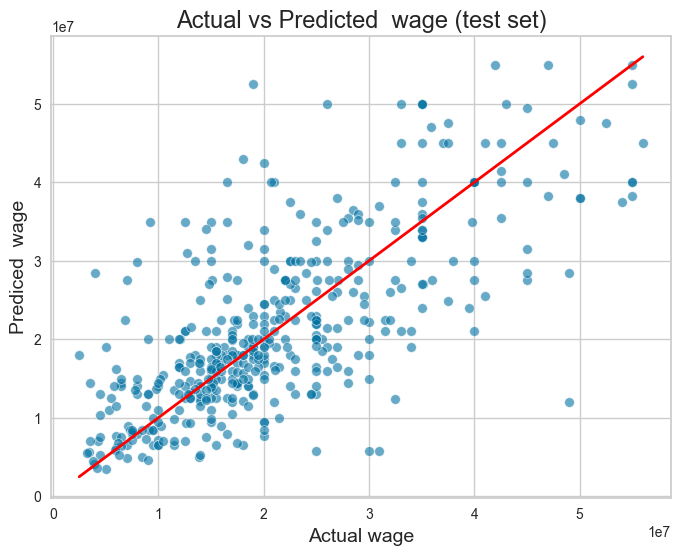

In [84]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [85]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

(68810417078475.34, 8295204.46)

## Подбор гиперпараметра

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [88]:
len(ccp_alphas)

1269

In [89]:
path.keys()

dict_keys(['ccp_alphas', 'impurities'])

In [90]:
path

{'ccp_alphas': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.58641471e+12, 1.45289686e+13, 2.78627558e+13]),
 'impurities': array([8.22388807e+11, 8.22388807e+11, 8.22388807e+11, ...,
        8.34648314e+13, 9.79938000e+13, 1.25856556e+14])}

In [91]:
RMSE_CV=[]
for alpha in ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(random_state=1,ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())

output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head()

,alpha,RMSE_CV
0,0.000000e+00,9.324365e+06
1,0.000000e+00,9.324365e+06
2,0.000000e+00,9.324365e+06
3,2.808989e+05,9.324365e+06
4,2.808989e+06,9.324364e+06


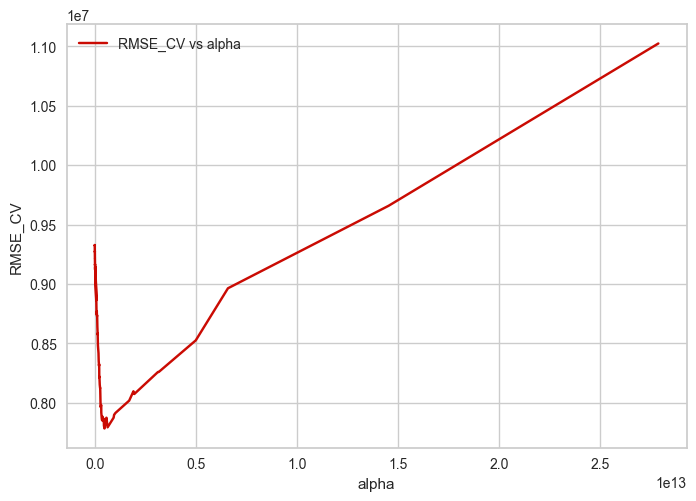

In [92]:
sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
plt.show()

In [93]:
np.argmin(output['RMSE_CV'])

1247

In [94]:
output.iloc[np.argmin(output['RMSE_CV']),]

alpha      4.817823e+11
RMSE_CV    7.785359e+06
Name: 1247, dtype: float64

In [95]:
optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
optimal_alpha

481782292979.5664

In [96]:
optimal_DT = DecisionTreeRegressor(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

In [97]:
MSE_test = round(np.mean(np.square(y_test - y_hat_opt)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

7193666.73

In [98]:
optimal_DT.get_params()

{'ccp_alpha': 481782292979.5664,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Визуализация дерева

In [112]:
dtree= DecisionTreeRegressor(ccp_alpha=optimal_alpha,max_depth= 3)
dtree.fit(X_train, y_train)
wage_hat = dtree.predict(X_test)

In [113]:
from sklearn import tree

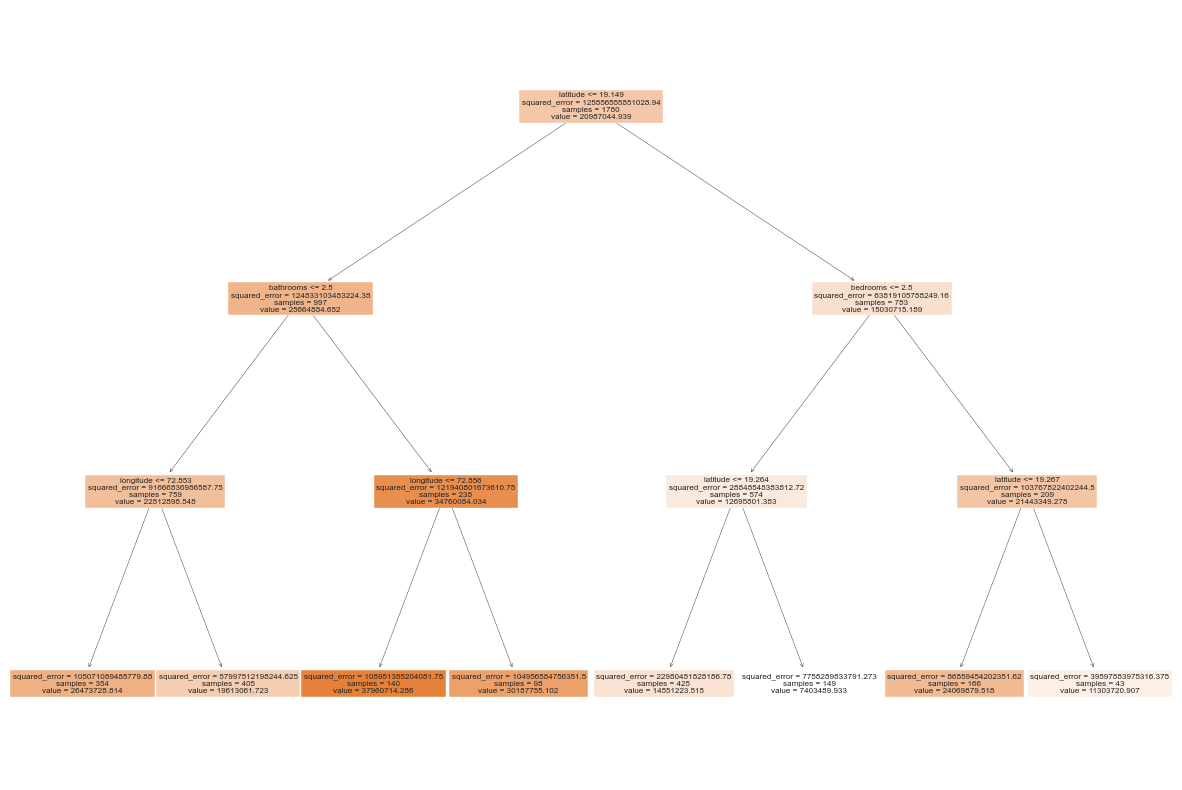

In [114]:
fig = plt.figure(figsize=(15,10))
DT_plot = tree.plot_tree(dtree, feature_names=X_train.columns, filled=True)

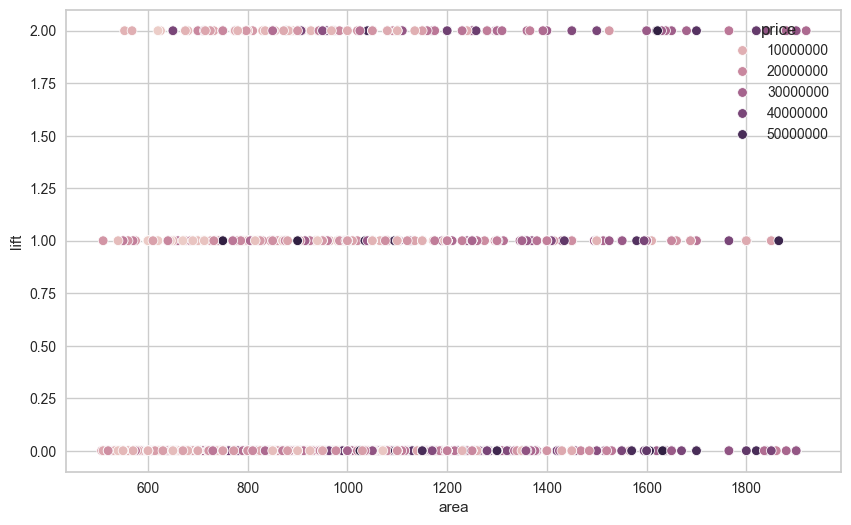

In [115]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='area', y='lift', data=df, hue='price')
plt.show()

In [116]:
fig.savefig("DT_plot_Regression.png")

## Решающие правила

In [117]:
tree_rules = export_text(Tree_regressor, feature_names=list(X.columns))
print(tree_rules)

|--- latitude <= 19.15
|   |--- bathrooms <= 2.50
|   |   |--- longitude <= 72.85
|   |   |   |--- latitude <= 19.11
|   |   |   |   |--- area <= 843.00
|   |   |   |   |   |--- latitude <= 18.94
|   |   |   |   |   |   |--- value: [55000000.00]
|   |   |   |   |   |--- latitude >  18.94
|   |   |   |   |   |   |--- latitude <= 18.95
|   |   |   |   |   |   |   |--- balcony <= 0.50
|   |   |   |   |   |   |   |   |--- value: [2200000.00]
|   |   |   |   |   |   |   |--- balcony >  0.50
|   |   |   |   |   |   |   |   |--- value: [3800000.00]
|   |   |   |   |   |   |--- latitude >  18.95
|   |   |   |   |   |   |   |--- latitude <= 19.02
|   |   |   |   |   |   |   |   |--- bedrooms <= 2.50
|   |   |   |   |   |   |   |   |   |--- balcony <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- longitude <= 72.83
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- longitude >  72.83
|   |   |   |   |   |   |   |   |   |

## PyCaret

In [118]:
from pycaret.utils import version
version()

'3.2.0'

In [119]:
df_py = pd.read_csv('../data/DataSet3.csv')

In [120]:
from pycaret.regression import *

In [121]:
setup(data=df_py,  target='price', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,price
2,Target type,Regression
3,Original data shape,"(6255, 13)"
4,Transformed data shape,"(6255, 15)"
5,Transformed train set shape,"(4378, 15)"
6,Transformed test set shape,"(1877, 15)"
7,Ordinal features,3
8,Numeric features,8
9,Categorical features,4


In [122]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [123]:
dt_reg = create_model(estimator='dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8756067.3516,320982014055365.3125,17915970.9214,0.6738,0.4907,0.3108
1,7568135.4642,190499034424150.1875,13802138.7627,0.6559,0.3927,0.3067
2,8906719.9391,378245914180618.9375,19448545.2973,0.3742,0.4666,0.3371
3,8969619.4825,277284088990360.2188,16651849.4165,0.5726,0.4657,0.3577
4,8322374.4292,321555028767123.3125,17931955.5199,0.6331,0.4132,0.3224
5,10006255.7078,634096851141552.5000,25181279.7757,0.4566,0.4296,0.3381
6,8482465.7534,256364847945205.4375,16011397.4389,0.6126,0.4889,0.4264
7,10481141.5525,489287929680365.3750,22119853.7446,0.6668,0.4526,0.3541
8,9335011.4416,526379759267734.5000,22942967.5340,0.2566,0.4543,0.3703


In [124]:
tuned_dt_reg = tune_model(dt_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8260808.2125,298698635987021.9375,17282900.1035,0.6965,0.3489,0.2869
1,6945912.6684,138543335311976.5312,11770443.2929,0.7498,0.3416,0.2814
2,7443900.3797,261535914128292.5625,16172072.0419,0.5673,0.3596,0.2942
3,7297964.6236,154090001999650.2812,12413299.4002,0.7625,0.3904,0.3190
4,7977632.6233,247927477419836.5625,15745712.9854,0.7171,0.3629,0.3061
5,8806738.9477,562096522783217.1250,23708574.8788,0.5183,0.3643,0.2775
6,7711851.9501,256988194427321.0938,16030851.3320,0.6116,0.3854,0.3406
7,8807269.4305,412110085161335.0625,20300494.7024,0.7193,0.3591,0.2881
8,7710954.4148,299006792888839.8750,17291812.8861,0.5777,0.3532,0.3045


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## BaggingRegressor

In [125]:
from sklearn.ensemble import BaggingRegressor

In [126]:
clf = BaggingRegressor(estimator=dtree, n_estimators=10).fit(X_train, y_train)
y_br_pred = clf.predict(X_test)

MSE_test = round(np.mean(np.square(y_test - y_br_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

(61232510070877.98, 7825120.45)

## GradientBoostingRegressor

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [128]:
MSE_test = round(np.mean(np.square(y_test - predict)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

(49097126287713.82, 7006934.16)

## StackingRegressor

In [129]:
from sklearn.ensemble import StackingRegressor
clf = StackingRegressor(estimators = [("dtr", dtree)], final_estimator=dtree).fit(X_train, y_train)
y_sc_pred = clf.predict(X_test)

MSE_test = round(np.mean(np.square(y_test - y_sc_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

(66212282573528.53, 8137093.01)

## CatBoost

In [130]:
from catboost import CatBoostRegressor

catboost_regr = CatBoostRegressor()
catboost_regr.fit(X_train, y_train)
catboost_pred = catboost_regr.predict(X_test)

MSE_test = round(np.mean(np.square(y_test - catboost_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

Learning rate set to 0.044848
0:	learn: 10965239.8577390	total: 4.03ms	remaining: 4.02s
1:	learn: 10750133.8520641	total: 8.68ms	remaining: 4.33s
2:	learn: 10534744.8268618	total: 13ms	remaining: 4.33s
3:	learn: 10320212.4244681	total: 15.1ms	remaining: 3.76s
4:	learn: 10132303.5051716	total: 17.2ms	remaining: 3.41s
5:	learn: 9958778.4885637	total: 19.7ms	remaining: 3.26s
6:	learn: 9791312.0711451	total: 26.2ms	remaining: 3.71s
7:	learn: 9618236.0318528	total: 29.8ms	remaining: 3.69s
8:	learn: 9484536.6501879	total: 34.7ms	remaining: 3.82s
9:	learn: 9336366.5608192	total: 39.5ms	remaining: 3.91s
10:	learn: 9186280.3679792	total: 41.6ms	remaining: 3.74s
11:	learn: 9056665.7997485	total: 44.8ms	remaining: 3.69s
12:	learn: 8946191.0224768	total: 46.7ms	remaining: 3.55s
13:	learn: 8840779.0491065	total: 48.4ms	remaining: 3.41s
14:	learn: 8731580.0960023	total: 50.1ms	remaining: 3.29s
15:	learn: 8630941.4755959	total: 55.7ms	remaining: 3.43s
16:	learn: 8527184.7764326	total: 57.6ms	remainin

(38544079669834.14, 6208387.85)

In [131]:
from xgboost import XGBRegressor

xgboost_regr = XGBRegressor()
xgboost_regr.fit(X_train, y_train)
xgboost_predict = xgboost_regr.predict(X_test)

MSE_test = round(np.mean(np.square(y_test - xgboost_predict)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

(41537522909788.96, 6444961.05)

In [132]:
from lightgbm import LGBMRegressor

lightGBM_regr = LGBMRegressor()
lightGBM_regr.fit(X_train, y_train)
lightGBM_predict = lightGBM_regr.predict(X_test)

MSE_test = round(np.mean(np.square(y_test - lightGBM_predict)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
MSE_test,RMSE_test

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 748
[LightGBM] [Info] Number of data points in the train set: 1780, number of used features: 7
[LightGBM] [Info] Start training from score 20987044.938764


(40414778729349.56, 6357261.89)